In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  #Pairwise distribution between data points
from sklearn.cluster import KMeans

In [49]:
nutrition_data = pd.read_csv('Nutrient_Composition_Dataset.csv')
nutrition_data.head()

,S.No,Protein,Fat,vitaminC,Fibre,Product
0,1,0.452369,1.170926,1.079271,1.702960,"Amaranth leaves, cooked, boiled, drained, with..."
1,2,2.321087,0.706856,0.350088,0.658249,Bacon and beef sticks
2,3,0.884554,1.186571,2.428544,1.984562,"Apples, frozen, unsweetened, unheated (Include..."
3,4,0.715501,0.577599,0.270925,0.369266,"Alcoholic beverage, beer, light, BUD LIGHT"
4,5,0.132610,0.544521,0.116884,0.557309,"Alcoholic beverage, daiquiri, canned"


In [50]:
nutrition_data_cleaned = nutrition_data.drop('S.No', axis=1)
nutrition_data_cleaned.head()

,Protein,Fat,vitaminC,Fibre,Product
0,0.452369,1.170926,1.079271,1.702960,"Amaranth leaves, cooked, boiled, drained, with..."
1,2.321087,0.706856,0.350088,0.658249,Bacon and beef sticks
2,0.884554,1.186571,2.428544,1.984562,"Apples, frozen, unsweetened, unheated (Include..."
3,0.715501,0.577599,0.270925,0.369266,"Alcoholic beverage, beer, light, BUD LIGHT"
4,0.132610,0.544521,0.116884,0.557309,"Alcoholic beverage, daiquiri, canned"


In [51]:
nutrition_data_attr = nutrition_data_cleaned.iloc[:,:-1]
nutrition_data_attr.head()

,Protein,Fat,vitaminC,Fibre
0,0.452369,1.170926,1.079271,1.702960
1,2.321087,0.706856,0.350088,0.658249
2,0.884554,1.186571,2.428544,1.984562
3,0.715501,0.577599,0.270925,0.369266
4,0.132610,0.544521,0.116884,0.557309


In [52]:
nutrition_data_scaled = nutrition_data_attr.apply(zscore)
nutrition_data_scaled.head()

,Protein,Fat,vitaminC,Fibre
0,-0.749825,0.426892,0.287212,1.279936
1,2.230835,-0.304578,-0.881972,-0.387079
2,-0.060478,0.451551,2.450659,1.729280
3,-0.330121,-0.508314,-1.008903,-0.848201
4,-1.259850,-0.560451,-1.255896,-0.548145


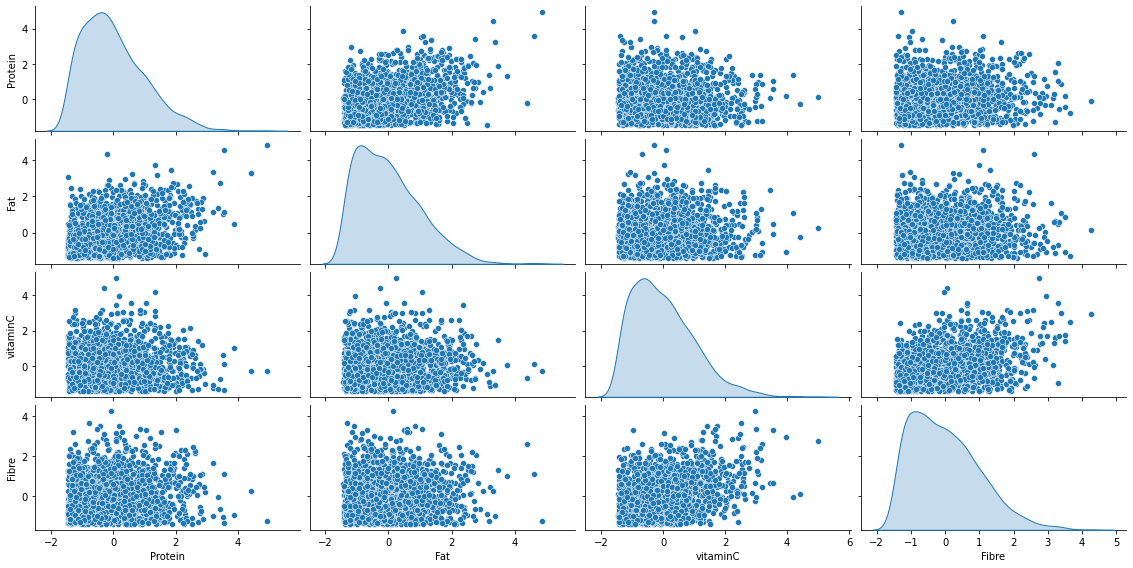

In [6]:
sns.pairplot(nutrition_data_scaled, height=2,aspect=2 , diag_kind='kde')

In [7]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')

In [8]:
model.fit(nutrition_data_scaled)

AgglomerativeClustering(linkage='average', n_clusters=3)

In [9]:
nutrition_data_attr['Labels'] = model.labels_
nutrition_data_attr.head(20)

,Protein,Fat,vitaminC,Fibre,Labels
0,0.452369,1.170926,1.079271,1.702960,0
1,2.321087,0.706856,0.350088,0.658249,0
2,0.884554,1.186571,2.428544,1.984562,0
3,0.715501,0.577599,0.270925,0.369266,0
4,0.132610,0.544521,0.116884,0.557309,0
5,1.267150,0.234292,0.546766,0.386447,0
6,0.351557,0.677176,0.551181,1.102799,0
7,0.635325,1.223652,0.330483,0.675459,0
8,0.527588,1.250053,1.247867,0.889896,0
9,0.598690,0.068307,1.423195,0.339158,0


In [10]:
nutrition_data_clust = nutrition_data_attr.groupby(['Labels'])
nutrition_data_clust.mean()

,Protein,Fat,vitaminC,Fibre
Labels,,,,
0,0.915496,0.891627,0.901215,0.900476
1,3.373949,3.290003,0.611800,0.698425
2,0.800346,3.677417,0.481411,2.527261


In [11]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering
Z = linkage(nutrition_data_scaled, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(nutrition_data_scaled))
c

0.6521952320724567

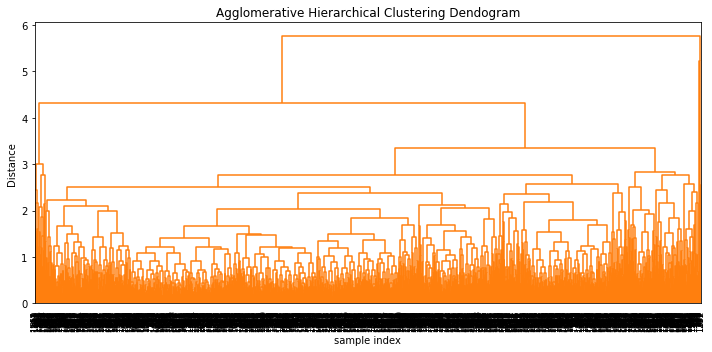

In [12]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [53]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(nutrition_data_scaled, metric='euclidean', method='complete')
c, coph_dists = cophenet(Z , pdist(nutrition_data_scaled))

c

0.4869572069304841

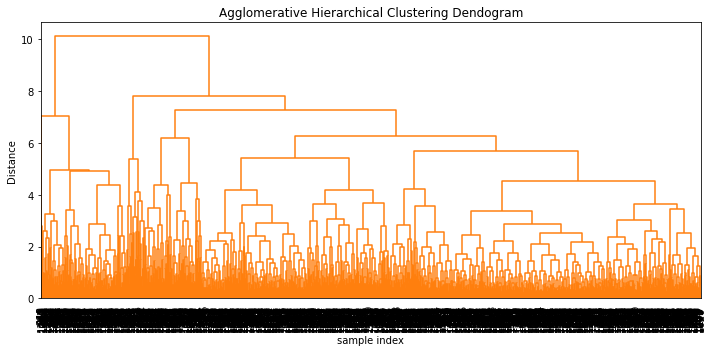

In [54]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold=90,  leaf_font_size=10. )
plt.tight_layout()

In [15]:
# 0.45786619671858036
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(nutrition_data_scaled, metric='euclidean', method='ward')
c, coph_dists = cophenet(Z , pdist(nutrition_data_scaled))

c

0.45786619671858036

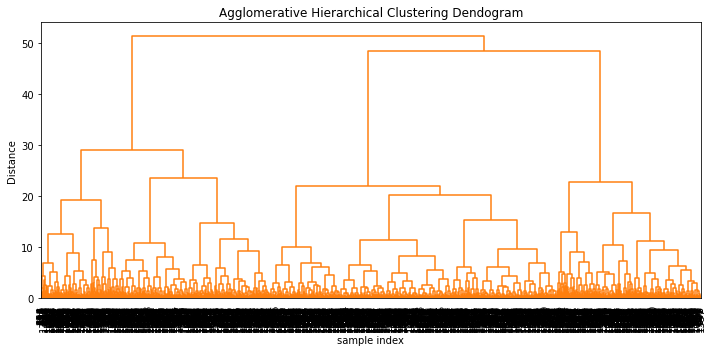

In [16]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold=600,  leaf_font_size=10. )
plt.tight_layout()

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

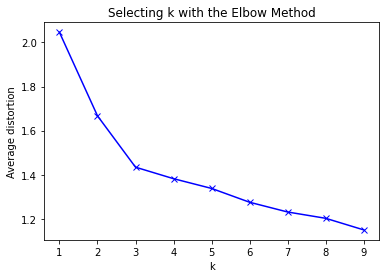

In [39]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_samples, silhouette_score
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    kmeans_model=KMeans(n_clusters=k)
    kmeans_model.fit(nutrition_data_scaled)
    prediction=kmeans_model.predict(nutrition_data_scaled)
    meanDistortions.append(sum(np.min(cdist(nutrition_data_scaled, kmeans_model.cluster_centers_, 'euclidean'), axis=1)) / nutrition_data_scaled.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

In [55]:
# Let us first start with K = 3
final_model=KMeans(3, random_state=1)
final_model.fit(nutrition_data_scaled)
prediction=final_model.predict(nutrition_data_scaled)
silhouette_avg = silhouette_score(nutrition_data_scaled, prediction)
print(silhouette_avg)
#Append the prediction 
nutrition_data_cleaned["GROUP"] = prediction
nutrition_data_scaled["GROUP"] = prediction
print("Groups Assigned : \n")
nutrition_data_cleaned.head()

0.2531861555258712
Groups Assigned : 



,Protein,Fat,vitaminC,Fibre,Product,GROUP
0,0.452369,1.170926,1.079271,1.702960,"Amaranth leaves, cooked, boiled, drained, with...",0
1,2.321087,0.706856,0.350088,0.658249,Bacon and beef sticks,1
2,0.884554,1.186571,2.428544,1.984562,"Apples, frozen, unsweetened, unheated (Include...",0
3,0.715501,0.577599,0.270925,0.369266,"Alcoholic beverage, beer, light, BUD LIGHT",2
4,0.132610,0.544521,0.116884,0.557309,"Alcoholic beverage, daiquiri, canned",2


In [19]:
nutrition_data_kmeans_cluster = nutrition_data_cleaned.groupby(['GROUP'])
nutrition_data_kmeans_cluster.mean()

,Protein,Fat,vitaminC,Fibre
GROUP,,,,
0,0.768679,0.813347,1.556940,1.542118
1,1.559056,1.552608,0.785471,0.825100
2,0.630082,0.561685,0.609397,0.595521


In [43]:
nutrition_data_kmeans_cluster.count()

,Protein,Fat,vitaminC,Fibre,Product
GROUP,,,,,
0,446,446,446,446,446
1,483,483,483,483,483
2,817,817,817,817,817


array([[<AxesSubplot:title={'center':'Fat'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Fibre'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Protein'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'vitaminC'}, xlabel='[GROUP]'>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

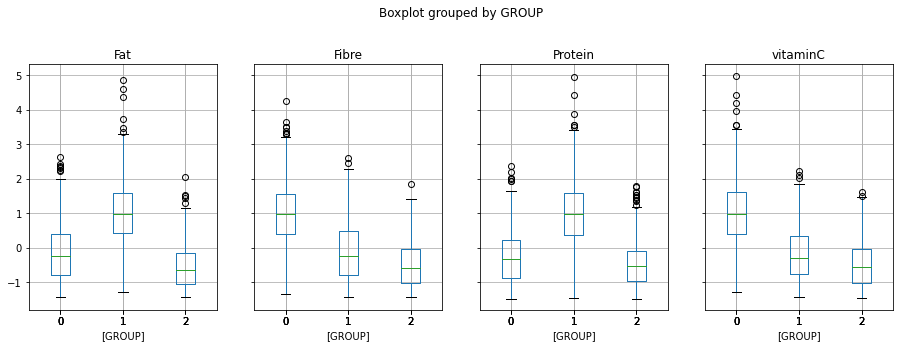

In [20]:
nutrition_data_scaled.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

array([[<AxesSubplot:title={'center':'Fat'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Fibre'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Protein'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'vitaminC'}, xlabel='[GROUP]'>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

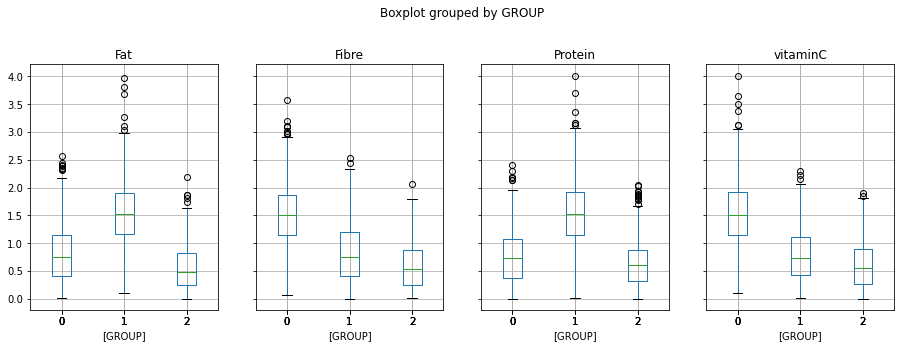

In [21]:
nutrition_data_cleaned.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

In [22]:
from sklearn.decomposition import PCA

In [23]:
covMatrix = np.cov(nutrition_data_scaled,rowvar=False)
print(covMatrix)

[[ 1.00057307  0.38253077  0.02540316  0.04384809 -0.15565463]
 [ 0.38253077  1.00057307  0.04829969  0.06811834 -0.21478888]
 [ 0.02540316  0.04829969  1.00057307  0.36167341 -0.48743136]
 [ 0.04384809  0.06811834  0.36167341  1.00057307 -0.48963051]
 [-0.15565463 -0.21478888 -0.48743136 -0.48963051  0.6786062 ]]


In [24]:
pca = PCA(n_components=4)
pca.fit(nutrition_data_scaled)
print(pca.explained_variance_)

[1.88934675 1.31364706 0.63843571 0.61794523]


In [25]:
print(pca.components_)

[[ 0.26533969  0.30917286  0.52689653  0.5366218  -0.51809658]
 [ 0.6509038   0.62293017 -0.31743085 -0.28163619  0.09055915]
 [ 0.0409774  -0.00544813  0.70260323 -0.71037147 -0.00349953]
 [-0.70712286  0.70283589 -0.02097072 -0.06675817 -0.03320475]]


In [26]:
print(pca.explained_variance_ratio_)

[0.40362908 0.28063994 0.1363917  0.13201424]


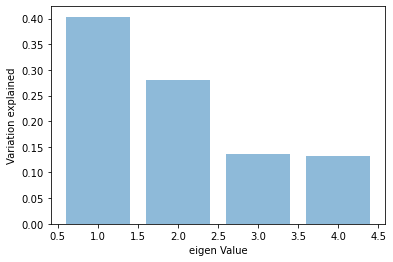

In [27]:
plt.bar(list(range(1,5)),pca.explained_variance_ratio_,alpha=0.5,align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

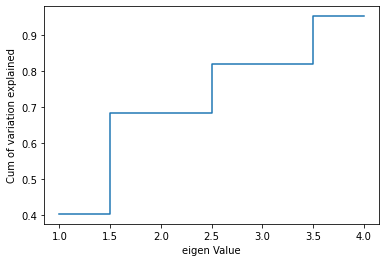

In [28]:
plt.step(list(range(1,5)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

In [29]:
pca3 = PCA(n_components=4)
pca3.fit(nutrition_data_scaled)
print(pca3.components_)
print(pca3.explained_variance_ratio_)
nutrition_data_scaled_pca = pca3.transform(nutrition_data_scaled)

[[ 0.26533969  0.30917286  0.52689653  0.5366218  -0.51809658]
 [ 0.6509038   0.62293017 -0.31743085 -0.28163619  0.09055915]
 [ 0.0409774  -0.00544813  0.70260323 -0.71037147 -0.00349953]
 [-0.70712286  0.70283589 -0.02097072 -0.06675817 -0.03320475]]
[0.40362908 0.28063994 0.1363917  0.13201424]


In [30]:
nutrition_data_scaled_pca

array([[ 1.3993821 , -0.78358757, -0.73624264,  0.77904458],
       [-0.06457296,  1.63206627, -0.25088929, -1.74015058],
       [ 2.97095794, -1.13282481,  0.49271475,  0.2335557 ],
       ...,
       [-1.07113054, -0.21237786,  0.85703248,  0.21440254],
       [ 0.80838682,  0.38460115,  0.43301935,  1.09858095],
       [ 0.63404754,  0.70551363, -1.07867806, -1.63748665]])

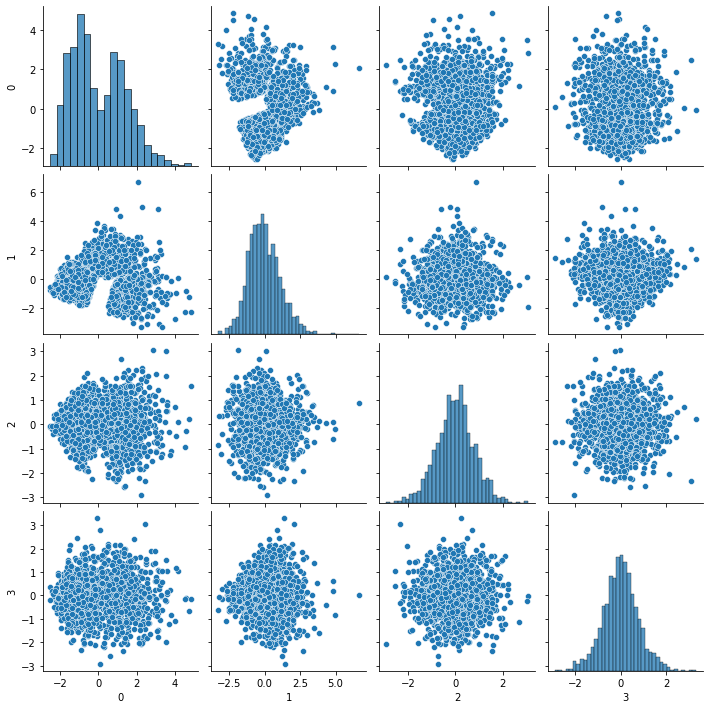

In [31]:
sns.pairplot(pd.DataFrame(nutrition_data_scaled_pca))

In [32]:
protein_values = nutrition_data_cleaned['Protein'].to_numpy(dtype ='float32')

In [34]:
q3, q1 = np.percentile(protein_values, [75 ,25])
iqr = q3 - q1
  
print(iqr)

0.8592526242136955


In [37]:
corr = nutrition_data_cleaned.corr()
corr

,Protein,Fat,vitaminC,Fibre,GROUP
Protein,1.000000,0.382312,0.025389,0.043823,-0.188899
Fat,0.382312,1.000000,0.048272,0.068079,-0.260662
vitaminC,0.025389,0.048272,1.000000,0.361466,-0.591535
Fibre,0.043823,0.068079,0.361466,1.000000,-0.594203
GROUP,-0.188899,-0.260662,-0.591535,-0.594203,1.000000


For n_clusters = 2, silhouette score is 0.8500561915096673)
For n_clusters = 3, silhouette score is 0.2509290329477406)
For n_clusters = 4, silhouette score is 0.2528792930318998)
For n_clusters = 5, silhouette score is 0.2084809872211241)
For n_clusters = 6, silhouette score is 0.20802030616790612)
For n_clusters = 7, silhouette score is 0.20888476920178994)
For n_clusters = 8, silhouette score is 0.2078457826778225)
For n_clusters = 9, silhouette score is 0.21017192719214903)


Text(0.5, 1.0, 'Selecting k with the Silhouette Score')

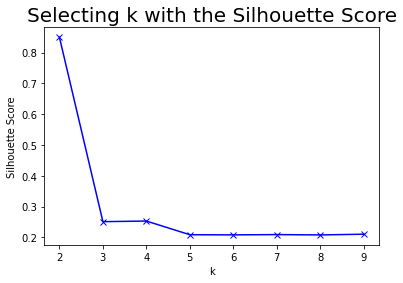

In [47]:
sil_score = []
cluster_list = list(range(2,10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters,random_state = 1)
    preds = clusterer.fit_predict((nutrition_data_scaled))
    #centers = clusterer.cluster_centers_
    score = silhouette_score(nutrition_data_scaled, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list,sil_score, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Selecting k with the Silhouette Score', fontsize=20)